In [1]:
%load_ext rpy2.ipython

In [2]:
#!gist -p Test_grid_cc_using_rho1_and_rho1_fromTADApaper_2013_geneset_all20000.ipynb

In [3]:
!gist -u https://gist.github.com/d27d7102b4f748b67187 Test_grid_cc_using_rho1_and_rho1_fromTADApaper_2013_geneset_all20000.ipynb

https://gist.github.com/d27d7102b4f748b67187


##LoF

In [4]:
%%R
library("data.table")

dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN = "grid.cc.LoF.all20000.data2013.txt"
d.cc.lof <- fread(paste(dirFile, fileN, sep = ""))


cLLK <- dim(d.cc.lof)[2]

#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.
Read 8041424 rows and 8 (of 8) columns from 0.368 GB file in 00:00:12
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [5]:
%%R
colNames <- c("pi", 'gamma.mean', 'beta', 'rho1', 'nu1', 'rho0', 'nu0', 'logLLK')
d.cc.lof[[cLLK]] <- -d.cc.lof[[cLLK]]
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 8041424       8
      V1 V2  V3   V4    V5  V6   V7        V8
1: 0.035  1 0.5 0.10 10000 0.1 1000 -52152.78
2: 0.035  1 0.5 0.25 10000 0.1 1000 -51884.03
3: 0.035  1 0.5 0.40 10000 0.1 1000 -51710.50
4: 0.035  1 0.5 0.55 10000 0.1 1000 -51573.14
5: 0.035  1 0.5 0.70 10000 0.1 1000 -51454.93
6: 0.035  1 0.5 0.85 10000 0.1 1000 -51350.44


In [6]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

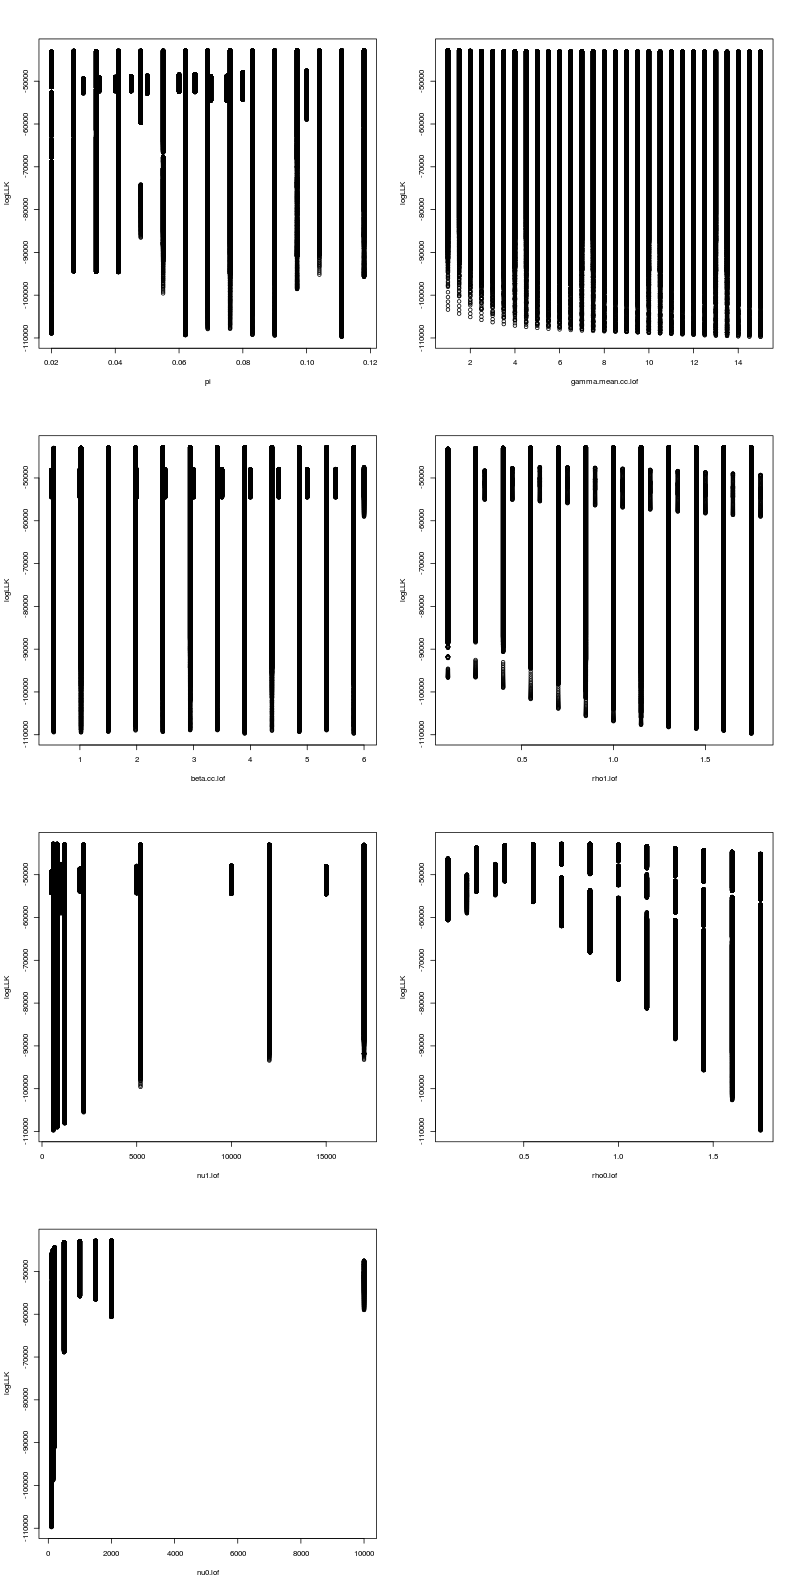

In [7]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

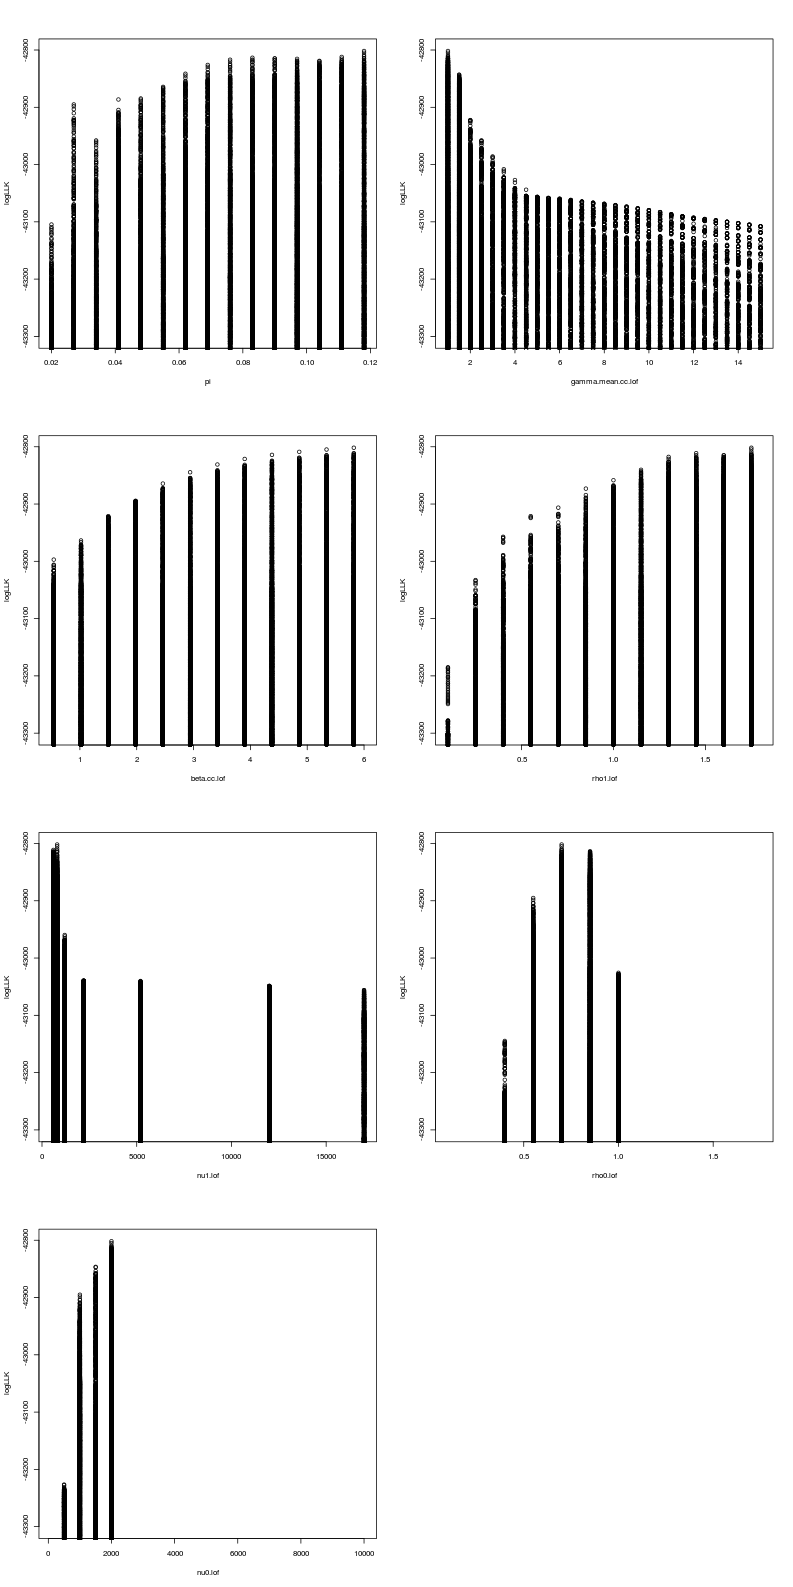

In [ ]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 500
d.cc.lof.1 <- d.cc.lof[V6>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [ ]:
%%R
d.cc.lof.1[order(V8)]

###Set limit for the proportion of protective variants and the frequency of variants

In [ ]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.02]

d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

d.cc.lof.1 <- d.cc.lof.1[V5 > V7]



#d.cc.lof.1 <- d.cc.lof.1[(V6/V7 - V4/V5) < 0.0002]



In [ ]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

In [ ]:
%%R -w 28 -h 28 -u cm
#pairs(d.cc.lof.1, col = 'blue')

In [ ]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 550
d.cc.lof.2 <- d.cc.lof.1[V8>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [ ]:
%%R -w 32 -h 32 -u cm
pairs(d.cc.lof.2 , col = 'red', labels = colNames)

In [ ]:
%%R
head(d.cc.lof.2[order(-V8)], 40)


In [ ]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 250
d.cc.lof.3 <- d.cc.lof.1[(V3>=0.8) & (V3 <= 1.3)]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.3[[ii]], d.cc.lof.3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

##MIS3

In [13]:
%%R
library("data.table")

dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN1 = "grid.cc.mis3.all20000.data2013.txt"
d.cc.mis3 <- fread(paste(dirFile, fileN1, sep = ""))


cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V8 != "NA"]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

Read 2884224 rows and 8 (of 8) columns from 0.132 GB file in 00:00:04
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


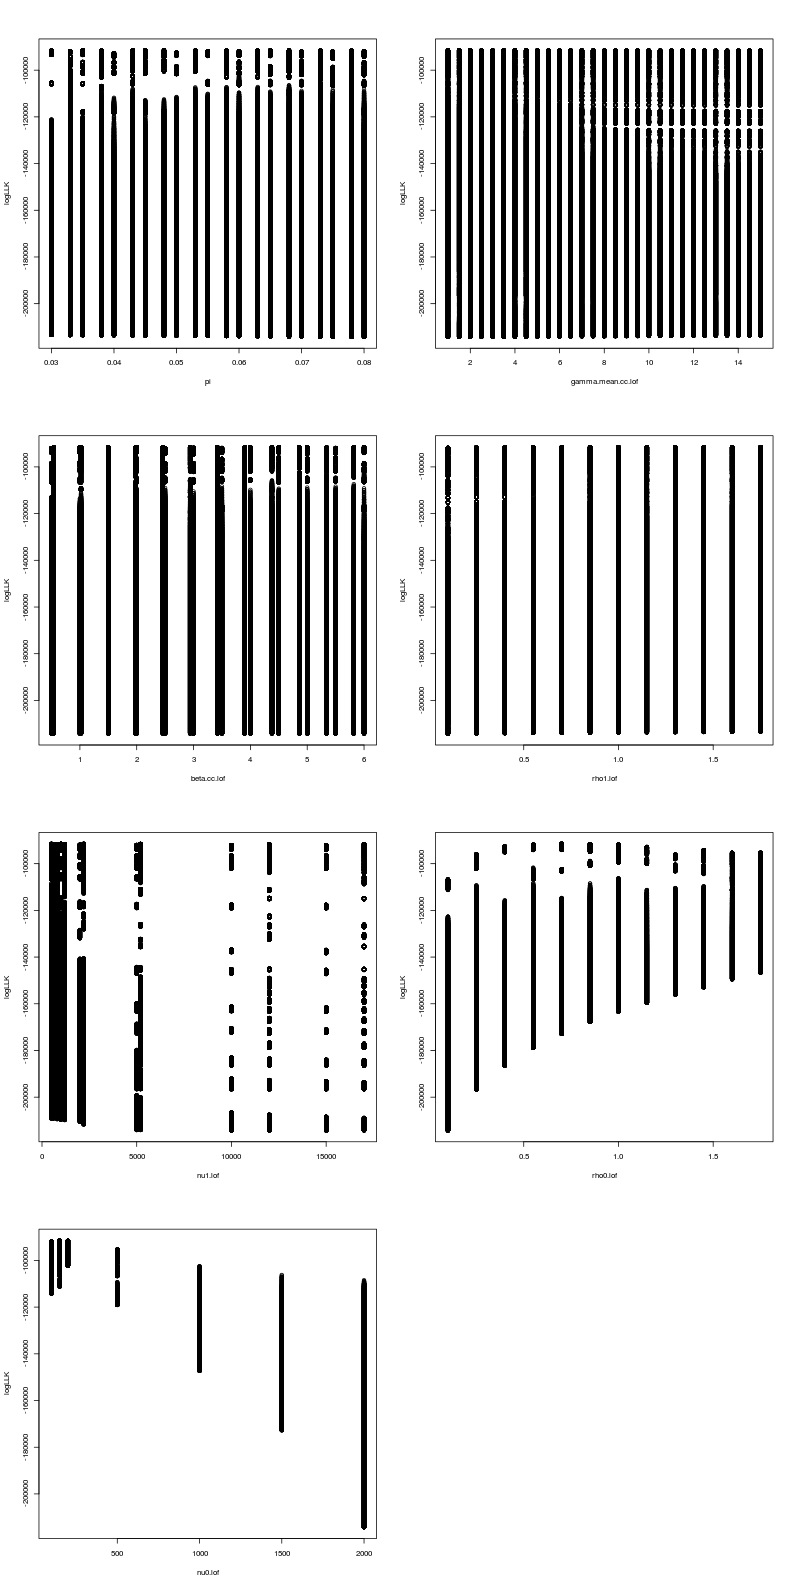

In [14]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

d.cc.mis3[[cLLK1]] <-  -d.cc.mis3[[cLLK1]]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK')
}

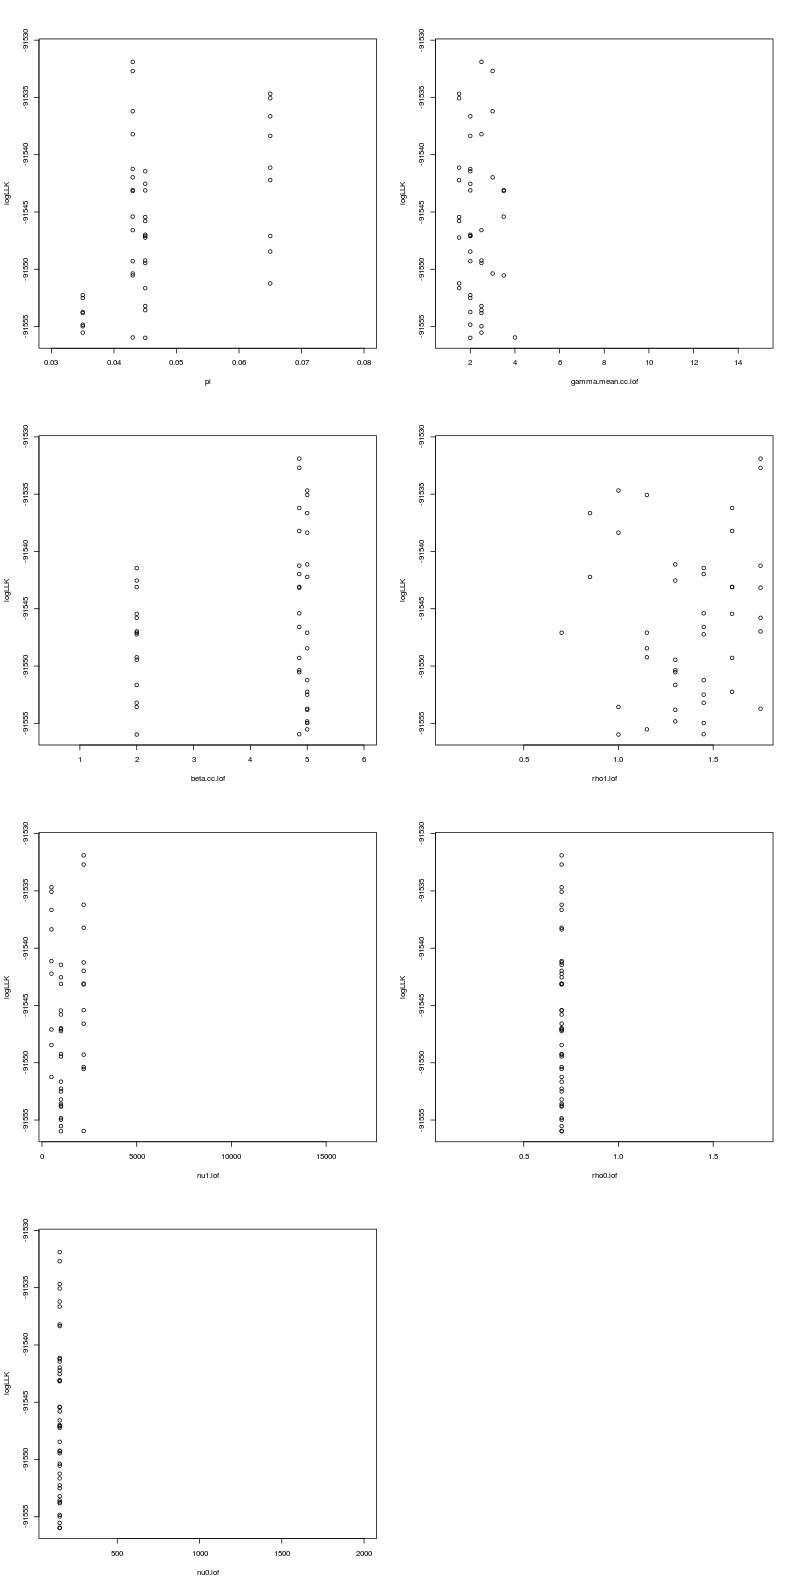

In [20]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 25

par(mfrow = c(4, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [16]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.02]

d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

d.cc.mis3.1 <- d.cc.mis3.1[(V6/V7 - V4/V5) < 0.0002]

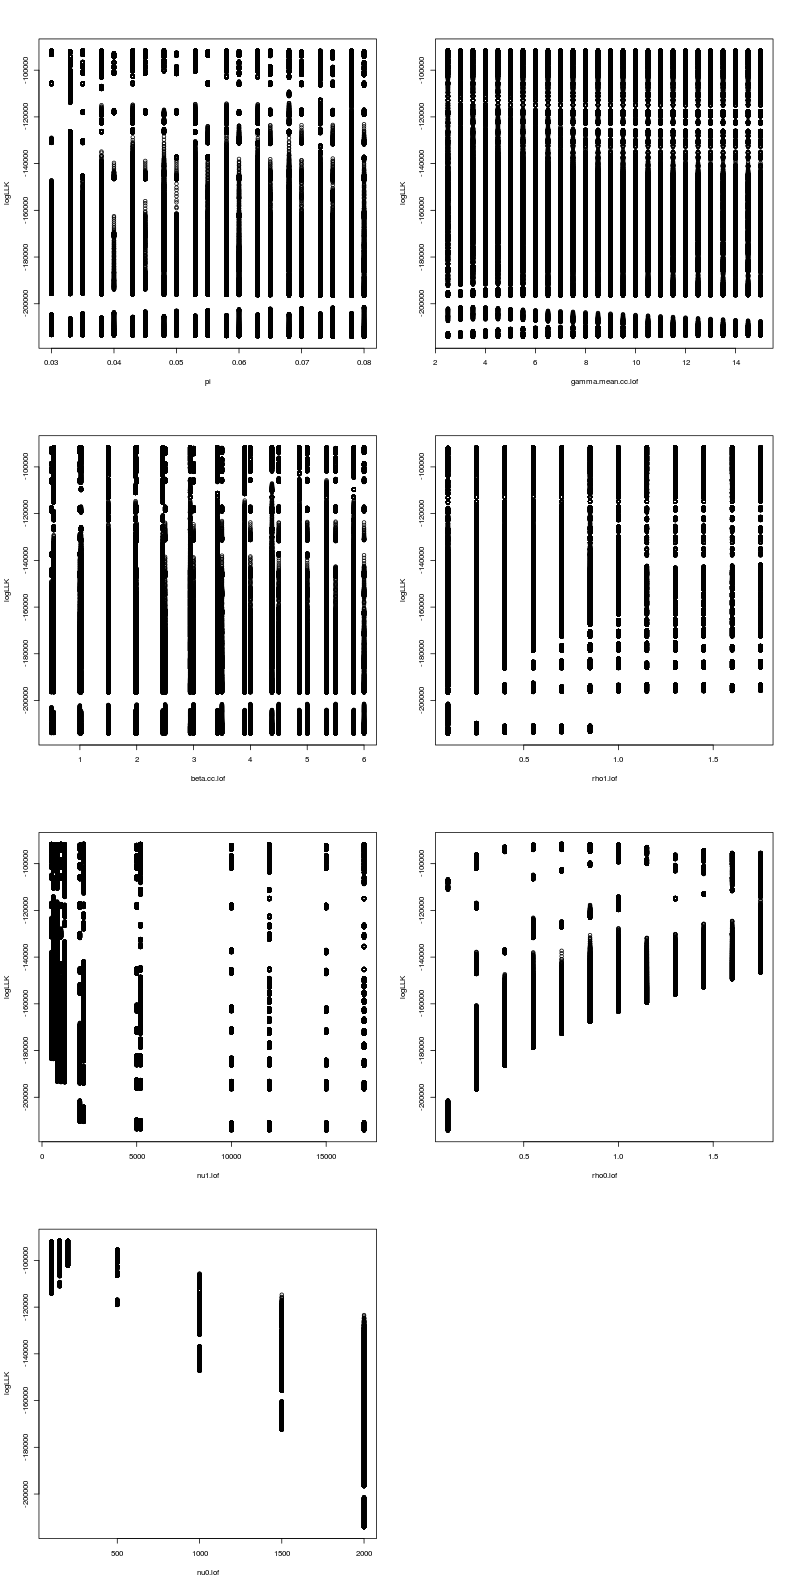

In [17]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

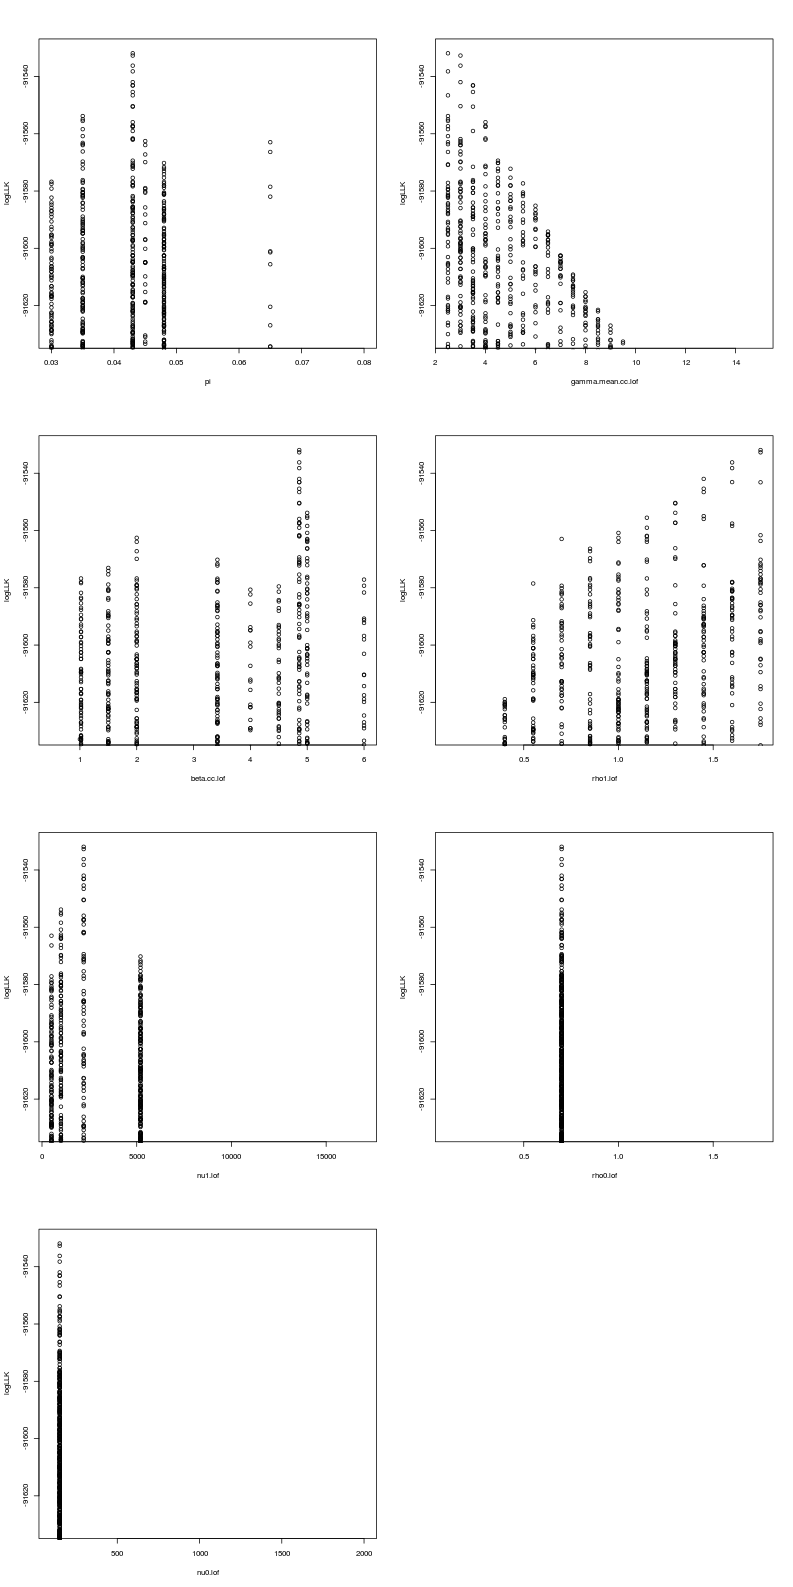

In [22]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 100

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [19]:
%%R
d.cc.mis3.1[V8>=lLimit]

       V1  V2   V3   V4   V5  V6  V7        V8
 1: 0.043 2.5 4.86 1.45 2200 0.7 150 -91546.58
 2: 0.043 2.5 4.86 1.60 2200 0.7 150 -91538.21
 3: 0.043 2.5 4.86 1.75 2200 0.7 150 -91531.89
 4: 0.043 3.0 4.86 1.30 2200 0.7 150 -91550.37
 5: 0.043 3.0 4.86 1.45 2200 0.7 150 -91541.97
 6: 0.043 3.0 4.86 1.60 2200 0.7 150 -91536.21
 7: 0.043 3.0 4.86 1.75 2200 0.7 150 -91532.69
 8: 0.043 3.5 4.86 1.30 2200 0.7 150 -91550.54
 9: 0.043 3.5 4.86 1.45 2200 0.7 150 -91545.40
10: 0.043 3.5 4.86 1.60 2200 0.7 150 -91543.09
11: 0.043 3.5 4.86 1.75 2200 0.7 150 -91543.16
